<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Спасибо за качественную работу)
</div>

Привет, Станислав!)
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### Описание проекта
- Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
- Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
- Построим модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверим F1-меру на тестовой выборке самостоятельно.
- Дополнительно измерим AUC-ROC, сравнив её значение с F1-мерой.

### Инструкция по выполнению проекта
- 1 Загрузим и подготовим данные. Поясним порядок действий.
- 2 Исследуем баланс классов, обучим модель без учёта дисбаланса. Кратко опишем выводы.
- 3 Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую. Кратко опишем выводы.
- 4 Проведем финальное тестирование.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Отличное введение 👍 Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение :)
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Рекомендую писать введение от первого лица множественного числа. Так работа выглядит более самостоятельной)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Поправил введение
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### 1 Загрузим и подготовим данные. Поясним порядок действий.

In [37]:
#ячейка импорта, тут хранятся все нужные мне  импортирования
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score
import seaborn as s
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌 Но также стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельности и простоты работы с кодом. <br>

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

- Первоначальное знакомство с данными

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


- Вывод информации о датафрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


- Тепловая карта

<AxesSubplot:>

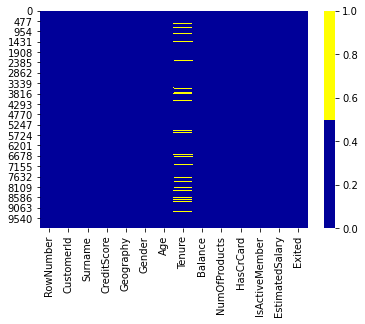

In [4]:
cols = data.columns
colours = ['#000099', '#ffff00'] 
s.heatmap(data[cols].isnull(), cmap=s.color_palette(colours))

- Анализ корреляций

In [5]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


#### Вывод по анализу данных:
- **RowNumber** можно удалить, это номер строки который ни к чему не относится
- **Tenure** имеет пропуски которые заполним значением 0 
- **Surname** не даст нам никакого аналитического преимущества, столбец можно удалить
- **Geography** и **Gender** преобразуем техникой OHE и избежанием дамми ловушки: 
```pd.get_dummies(df['column'], drop_first=True)```

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍 Спасибо за информативный вывод)
</div>

- Подготовим данные

In [6]:
data_clean = data.drop(['RowNumber', 'Surname','CustomerId'], axis = 1)
data_clean['Tenure'] = data_clean['Tenure'].fillna(0)
data_clean = pd.get_dummies(data_clean, drop_first=True)
display(data_clean)
display(data_clean.columns)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Признак customer_id тоже не пригодится для обучения моделей.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> CustomerId также удалил
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>
    
Согласен с таким заполнением 👍
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данном случае это наиболее подходящий способ закодировать категориальные колонки 👍
</div>

<AxesSubplot:>

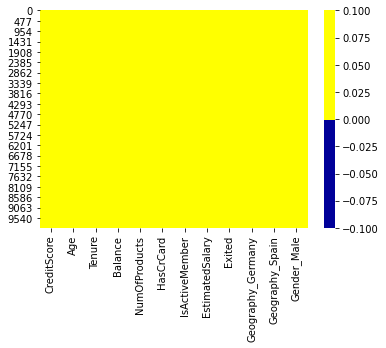

In [7]:
cols = data_clean.columns
colours = ['#000099', '#ffff00'] 
s.heatmap(data_clean[cols].isnull(), cmap=s.color_palette(colours))

#### Вывод по шагу:
- Данные подготовлены согласно выводу по анализу данных, переходим к следующему шагу

### 2 Исследуем баланс классов, обучим модель без учёта дисбаланса. Кратко описав выводы.

0    7963
1    2037
Name: Exited, dtype: int64

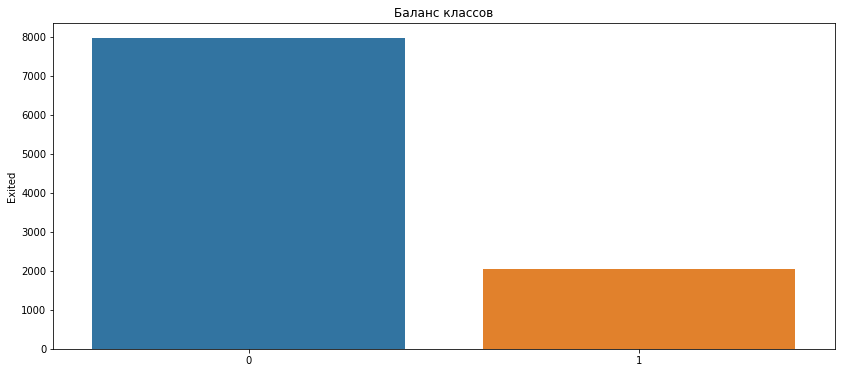

In [8]:
plt.figure(figsize=(14,6))
s.barplot(x=[0,1],y=data_clean.Exited.value_counts())
plt.title("Баланс классов")

data_clean.Exited.value_counts()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Виден явный дисбаланс классов в пользу отрицательного класса. Если мы будем всех людей прогнозировать, что они не уйдут из банка, то в 80% случаев мы будем правы.
</div>

- Мы наблюдаем явный дисбаланс классов,  клиентов которые не ушли намного больше
- Разделим данные на тестовую и валидационную выборку
- Обучим модель, для этого подойдет модель **RandomForestClassifier** которая хорошо себя зарекомендовала в подобных задачах на тренажере

In [9]:
feature = data_clean.drop(['Exited'], axis = 1)
target = data_clean.Exited

#Откусим кусочек для финального тестирования:
feature, feature_test, target, target_test = train_test_split(
    feature, target, test_size=0.10, random_state=12345)

feature_train, feature_valid, target_train, target_valid = train_test_split(feature, target,  
                                                                            test_size=0.25, random_state=12345)
columns_ft = feature_train.columns
index_ft = feature_train.index
index_fte = feature_test.index
index_fv = feature_valid.index

#Масштабировал численные признаки 
scaler = StandardScaler() 
scaler.fit(feature_train)

feature_train = scaler.transform(feature_train)
feature_test = scaler.transform(feature_test)
feature_valid = scaler.transform(feature_valid)

#И обратно вернем в датафрейм потому что  переменная не очень понимает как работать с numpy массивом
def convert_feature(dataframe, index):
    dataframe_converted = pd.DataFrame(data = dataframe, columns = columns_ft, index = index)
    return dataframe_converted

def convert_target(dataframe, index):
    dataframe_converted = pd.DataFrame(data = dataframe, index = index)
    return dataframe_converted

feature_train = convert_feature(feature_train, index_ft)
feature_test =  convert_feature(feature_test, index_fte)
feature_valid = convert_feature(feature_valid, index_fv)

target_train = convert_target(target_train, index_ft)
target_test =  convert_target(target_test, index_fte)
target_valid = convert_target(target_valid, index_fv)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Масштабировал численные признаки 
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [11]:
model = RandomForestClassifier(random_state=12345)
model.fit(feature_train, target_train)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/tmp/ipykernel_187/2707477540.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(feature_train, target_train)


'F1 метрика модели:'

0.593103448275862

'AUC-ROC:'

0.7230212881588106

In [12]:
model = LogisticRegression(random_state=12345)
model.fit(feature_train, target_train)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'F1 метрика модели:'

0.3250414593698176

'AUC-ROC:'

0.5935353828630135

### Вывод по шагу
- Чтобы сдать проект успешно, нужно довести метрику до 0.59, сейчас у нас 0.56, продолжим улучшение модели, причина  недостаточной точности - дисбаланс классов, а значит нужно его минимизировать. 
- Логистическая регрессия сильно отстает в показателях

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Можешь добавить обучение еще одной модели в обучении без учета дисбаланса?
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Добавил LogisticRegression
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### 3 Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую. Кратко опишем выводы.

- Для балансирования классов применим метод **Upsampling**
- Перемешаем объекты после балансирования через ```features,target=shuffle(features,target,random_state=12345)```
- Модели обучим со взвешиванием классов ```model=LogisticRegression(class_weight='balanced',random_state=12345)```
- Выполним подсчёт метрики **AUC-ROC**
- Выполним подсчет метрики **F1**

In [13]:
def upsample(features, target, repeat):
    
    features_zeros = features[target.Exited == 0] 
    features_ones = features[target.Exited == 1] 
    target_zeros = target[target.Exited == 0] 
    target_ones = target[target.Exited == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

ups_features, ups_target = upsample(feature_train, target_train, 4)

Text(0.5, 1.0, 'Баланс классов')

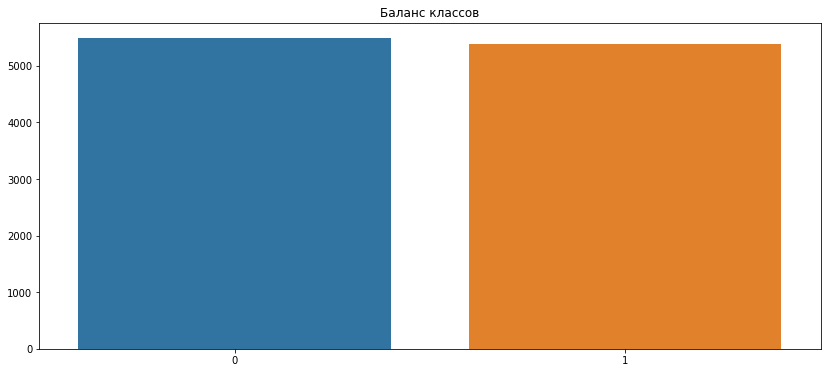

In [14]:
plt.figure(figsize=(14,6))
s.barplot(x=[0,1],y=ups_target.value_counts())
plt.title("Баланс классов")

- Выглядит отлично! 
- Время поэкспериментировать с моделями! 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Увеличение выборки выполнено верно - классы сбалансированы 👍 
</div>

- Логистическая регрессия

In [15]:
model=LogisticRegression(random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'F1 метрика модели:'

0.4992150706436421

'AUC-ROC:'

0.7145510651524118

- Логистическая регрессия c class_weight='balanced'

In [27]:
model=LogisticRegression(class_weight='balanced',random_state=12345)
model.fit(feature_train, target_train)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'F1 метрика модели:'

0.5023771790808241

'AUC-ROC:'

0.7164829683562445

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для линейных моделей помогло бы масштабирование численных признаков. Можешь выполнить это сразу после разбиения данных? Scaler обучаешь на тренировочной выборке, затем по очереди применяешь стандартизацию ко всем выборкам.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Да, конечно, добавил, спасибо!
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

- Дерево решений

In [30]:
model=DecisionTreeClassifier(random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

'F1 метрика модели:'

0.4796380090497738

'AUC-ROC:'

0.6747404586688107

- Дерево решений c class_weight='balanced'

In [28]:
model=DecisionTreeClassifier(class_weight='balanced',random_state=12345)
model.fit(feature_train, target_train)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

'F1 метрика модели:'

0.4646924829157176

'AUC-ROC:'

0.6652372816372414

- Проверим на лесе,  логистическая регрессия никогда не внушала доверия а просто дерево слабовато

In [31]:
model=RandomForestClassifier(random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/tmp/ipykernel_187/3976911378.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(ups_features, ups_target)


'F1 метрика модели:'

0.6034063260340633

'AUC-ROC:'

0.7421858423879664

- Лес с class_weight='balanced'

In [32]:
model=RandomForestClassifier(class_weight='balanced',random_state=12345)
model.fit(feature_train, target_train)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/tmp/ipykernel_187/4172907043.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(feature_train, target_train)


'F1 метрика модели:'

0.5754985754985755

'AUC-ROC:'

0.711253056985561

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Балансировка весов классов (class_weight) и увеличение выборки это разные методы борьбы с дисбалансом. Их конечно можно использовать вместе, но в нашей задаче мы должны сравнивать их. Можешь выполнить их по отдельности?)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Выполнил по отдельности
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

- Очевидно, что модель случайного леса намного лучше справилась, текущего значения нам достаточно чтобы завершить проект, но есть еще возможность оптимизировать модель с помощью **GridSearch** и от такой возможности отказываться не хочется совершенно. 
- Плюс мы можем использовать одновременно увеличение выборки и балансировку классов, посмотрим что получится:

In [19]:
#После запуска этого коа можно налить себе чаю с печеньками и найти какую-нидуь интересную книгу :) 
#я код закоментировал т.к. он требовался только один раз для подбора наилучших параметров
'''
clf = RandomForestClassifier(random_state =0)

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(ups_features, ups_target)
grid.best_params_
'''

"\nclf = RandomForestClassifier(random_state =0)\n\nparametrs = { 'n_estimators': range (10, 51, 10),\n              'max_depth': range (1,13, 2),\n              'min_samples_leaf': range (1,8),\n              'min_samples_split': range (2,10,2) }\n\ngrid = GridSearchCV(clf, parametrs, cv=5)\ngrid.fit(ups_features, ups_target)\ngrid.best_params_\n"

In [34]:
model=RandomForestClassifier(class_weight='balanced', n_estimators = 40, max_depth = 11, min_samples_leaf = 1,
                             min_samples_split = 2, random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_valid)

display('F1 метрика модели:', f1_score(target_valid, predictions))
display('AUC-ROC:', roc_auc_score(target_valid, predictions))

/tmp/ipykernel_187/2285031806.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(ups_features, ups_target)


'F1 метрика модели:'

0.6094069529652352

'AUC-ROC:'

0.7687188019966722

### Вывод по шагу
- Модель случайного леса показала лучшее качество, инструмент **GridSearchCV** помог его еще немного улучшить
- Также помог метод **Upsampling** 
- Метрики **F1** и **AUC-ROC**  показывают хорошие результаты

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Модели обучены корректно 👍
</div>

#### 4 Проведите финальное тестирование.
- Проверим все модели на тестовой выборке
- Сравним модели с dummy чтобы было с чем сравнивать
- Нарисуем какой-нибудь прикольный график

In [21]:
model=DummyClassifier(random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_test)

dummy_f1 = f1_score(target_test, predictions)

display('F1 метрика модели:', dummy_f1)
display('AUC-ROC:', roc_auc_score(target_test, predictions))

'F1 метрика модели:'

0.3579638752052545

'AUC-ROC:'

0.5

In [22]:
model=LogisticRegression(random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_test)

lr_f1 = f1_score(target_test, predictions)

display('F1 метрика модели:', lr_f1)
display('AUC-ROC:', roc_auc_score(target_test, predictions))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'F1 метрика модели:'

0.5174129353233832

'AUC-ROC:'

0.7113787277974614

In [23]:
model=DecisionTreeClassifier(class_weight='balanced', random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_test)

dt_f1 = f1_score(target_test, predictions)

display('F1 метрика модели:', dt_f1)
display('AUC-ROC:', roc_auc_score(target_test, predictions))

'F1 метрика модели:'

0.463768115942029

'AUC-ROC:'

0.6562448673127009

In [24]:
model=RandomForestClassifier(class_weight='balanced', n_estimators = 40, max_depth = 11, min_samples_leaf = 1,
                             min_samples_split = 2, random_state=12345)
model.fit(ups_features, ups_target)
predictions = model.predict(feature_test)

df_f1 = f1_score(target_test, predictions)

display('F1 метрика модели:', df_f1)
display('AUC-ROC:', roc_auc_score(target_test, predictions))

/tmp/ipykernel_187/1639011117.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(ups_features, ups_target)


'F1 метрика модели:'

0.6187363834422658

'AUC-ROC:'

0.7623888406579225

{'DummyClassifier': 0.3579638752052545,
 'LogisticRegression': 0.5174129353233832,
 'DecisionTreeClassifier': 0.463768115942029,
 'RandomForestClassifier': 0.6187363834422658}

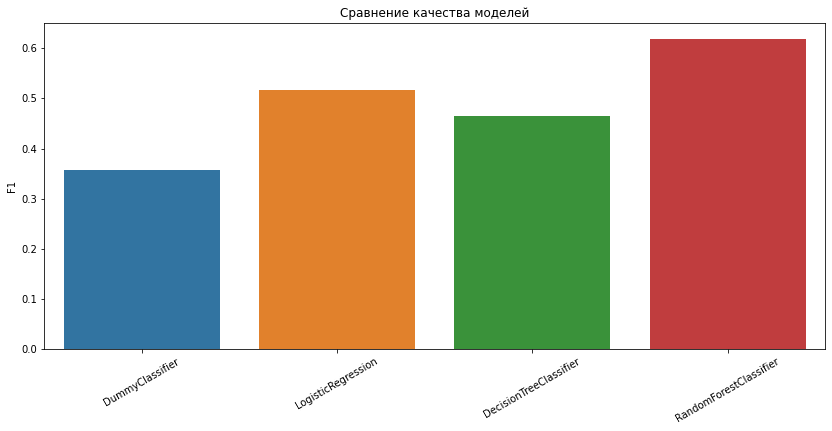

In [25]:
all_metrics = ({'DummyClassifier':dummy_f1, 'LogisticRegression':lr_f1, 
                  'DecisionTreeClassifier':dt_f1, 'RandomForestClassifier':df_f1,
                 })



plt.figure(figsize=(14,6))
ax = s.barplot(x = list(all_metrics.keys()), y=list(all_metrics.values()))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("Сравнение качества моделей")
plt.ylabel("F1")

#all_metrics = sorted(all_metrics.items(), key=lambda kv: kv[1])

display(all_metrics)

- Посмотрим как выглядит ROC-кривая лучшей модели.

/tmp/ipykernel_187/449323435.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(ups_features, ups_target)


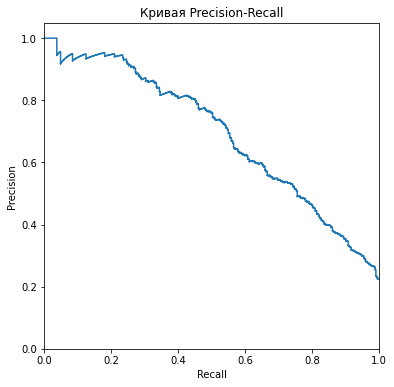

In [40]:
model=RandomForestClassifier(class_weight='balanced', n_estimators = 40, max_depth = 11, min_samples_leaf = 1,
                             min_samples_split = 2, random_state=12345)
model.fit(ups_features, ups_target)

probabilities_valid = model.predict_proba(feature_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отличный результат 👍 
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Здесь можно визуализировать ROC-кривую лучшей модели.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Готово! 
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Финальный вывод
- Был проведен анализ данных, можно сказать что датасет достаточно беспроблемный т.к. нормализация была не сложной,  пустые данные присутствовали только в  столбце **Tenure**, их впоследствии обработки заполнили значением 0, также были удалены **RowNumber** и **Surname**. 
- **Geography** и **Gender**  преобразовали техникой OHE
- В процессе сравнения классов был обнаружен явный дисбаланс классов,  клиентов которые не ушли намного больше
- Для балансирования классов был использован метод **Upsampling**
- Также было проведено сравнительное исследование моделей, модель случайного леса показала наилучший результат метрики **F1** и наибольшее значение метрики **AUC-ROC**, после чего была допольнительно оптимизирована с помощью **GridSearch**
- Выполнен сравнительный анализ метрик на тестовой выборке, для сравнения  использована модель **DummyClassifier**
- По графику мы видим насколько большой отрыв у модели **RandomForestClassifier**, лучшее качество  может показать многослойный перцептрон но мы его еще не проходили :)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Анализ данных на python и pandas https://www.youtube.com/watch?v=dd3RcafdOQk&t=82s
* Курс "Введение в машинное обучение" https://stepik.org/course/4852
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результаты обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"